<a href="https://colab.research.google.com/github/ZaimaSartajTaheri/ResearchCodes/blob/main/tamim_cnn_model_final_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [65]:
test_dir="/content/drive/MyDrive/CovidDataset/Test"
train_dir="/content/drive/MyDrive/CovidDataset/Train"
val_dir="/content/drive/MyDrive/CovidDataset/Val"

In [66]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import optimizers
from keras.callbacks import History 
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    # rotation_range=20,
     #width_shift_range=0.1,
    # shear_range=0.1,
     zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [67]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=32, 
                                            shuffle=True, 
                                            class_mode='categorical',
                                            target_size=(224, 224))

validation =image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='categorical',
                                                target_size=(224, 224))

test =image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='categorical',
                                            target_size=(224, 224))

Found 8376 images belonging to 3 classes.
Found 2792 images belonging to 3 classes.
Found 2790 images belonging to 3 classes.


In [68]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
# model.add(Dense(64,activation='relu'))

model.add(Dense(3,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 54, 54, 64)       

In [70]:

r = model.fit(
    train, 
    epochs=20,
    validation_data=validation,
    validation_steps=262,
)

Epoch 1/20
262/262 [==============================] - 244s 741ms/step - loss: 0.6332 - accuracy: 0.7093 - val_loss: 0.4964 - val_accuracy: 0.8130
Epoch 2/20
262/262 [==============================] - 143s 544ms/step - loss: 0.3176 - accuracy: 0.8716 - val_loss: 0.4390 - val_accuracy: 0.8511
Epoch 3/20
262/262 [==============================] - 142s 541ms/step - loss: 0.2708 - accuracy: 0.8963 - val_loss: 0.3804 - val_accuracy: 0.8588
Epoch 4/20
262/262 [==============================] - 143s 546ms/step - loss: 0.2383 - accuracy: 0.9094 - val_loss: 0.2964 - val_accuracy: 0.9008
Epoch 5/20
262/262 [==============================] - 142s 542ms/step - loss: 0.1881 - accuracy: 0.9301 - val_loss: 0.4338 - val_accuracy: 0.8740
Epoch 6/20
262/262 [==============================] - 143s 546ms/step - loss: 0.1804 - accuracy: 0.9314 - val_loss: 0.4760 - val_accuracy: 0.8588
Epoch 7/20
262/262 [==============================] - 141s 540ms/step - loss: 0.1519 - accuracy: 0.9440 - val_loss: 0.1873 -

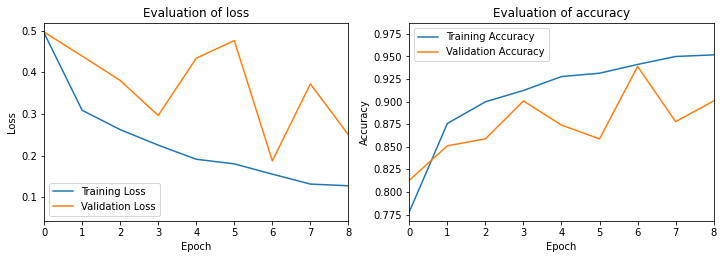

In [71]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Training Loss',scalex=True)
plt.plot(r.history['val_loss'], label='Validation Loss',scalex=True)
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.xlim(0,8)
plt.legend()
plt.title('Evaluation of loss')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xlim(0,8)
plt.legend()
plt.title('Evaluation of accuracy')
plt.savefig("cnn_curve3.png")

In [72]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

2790/2790 [==============================] - 47s 17ms/step - loss: 0.2800 - accuracy: 0.9176
Test Accuracy: 91.76%
262/262 [==============================] - 133s 507ms/step - loss: 0.0352 - accuracy: 0.9865
Train Accuracy: 98.65%


In [73]:
from keras.utils.np_utils import to_categorical 
num_classes=len(test.class_indices)

test_labels = test.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes) 
test_labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [74]:
from sklearn.metrics import confusion_matrix, classification_report

# rounded_labels=np.argmax(test, axis=1)

pred = model.predict(test)
# pred = np.argmax(predictions, axis=1)

y_pred=np.argmax(pred, axis=1)
y_test=np.argmax(test_labels, axis=1)


cnf_matrix=confusion_matrix(y_test, y_pred)
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

,0,1,2,accuracy,macro avg,weighted avg
precision,0.934409,0.846006,0.991474,0.91828,0.923963,0.923963
recall,0.934409,0.945161,0.875269,0.91828,0.918280,0.918280
f1-score,0.934409,0.892839,0.929754,0.91828,0.919001,0.919001
support,930.000000,930.000000,930.000000,0.91828,2790.000000,2790.000000


In [75]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[869  58   3]
 [ 47 879   4]
 [ 14 102 814]]


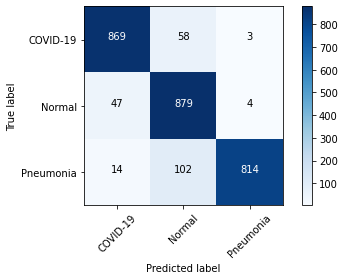

In [76]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COVID-19', 'Normal', 'Pneumonia'])
plt.savefig("CNN_CONFUTIONMATRIX3.png")

In [77]:
model.save('tamim_cnn_model_final_1.h5')